# MLB Wins Above Replacement

***

## Project Description

Peer-graded Assignment: #MakeoverMonday Community Project Activity

If you haven’t gotten the memo by now, I am very much into the #MakeoverMonday community project as I feel that it is an amazing way to learn, grow, and even have fun.  Now is your chance to dip a toe into this great experience!   

To start off with, you’ll need to choose a viz you want to make over. You can choose from any of the past projects, in any year, on the official #MakeoverMonday website here:  https://www.makeovermonday.co.uk/data/ The data sets for 2018 and later are all hosted on data.world, so those might be easier to view as you are just getting started

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| RK | Rank 	|
| PLAYER | Player Name |
| YEAR | Year	|
| OFF | Offensive Wins Above Replacement	|
| RB | Batting Runs From Weighted Runs Above Average |
| RBR | Baserunning Runs From Weighted Runs Above Average	|
| RAR |	Runs Above Replacement |
| RAAO | Offensive Runs Above Average	|
| WAAO | Offensive Wins Above Average	|
| WAAWPO | W-L Percentage Off Offensive Wins Above Average	|
| TRPG | Average Team Runs Per Game With Player	|

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero
from numpy import median
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("MLB.csv")

In [3]:
df

,RK,PLAYER,YEAR,OFF,RB,RBR,RAR,RAAO,WAAO,WAAWPO,TRPG
0,1,Barry Bonds,2001,12.40,115.80,0.50,126.30,110.40,10.40,0.60,5.50
1,2,Babe Ruth,1921,12.20,116.40,-0.80,140.20,108.90,9.80,0.60,5.80
2,2,Babe Ruth,1923,12.20,113.00,-3.80,146.30,102.20,9.70,0.60,5.50
3,4,Babe Ruth,1920,11.80,108.70,-1.10,125.20,101.00,9.60,0.60,5.50
4,4,Barry Bonds,2002,11.80,108.80,-1.60,120.70,101.60,9.90,0.60,5.20
...,...,...,...,...,...,...,...,...,...,...,...
195,195,Lenny Dykstra,1990,5.80,29.30,5.70,83.40,37.70,3.80,0.50,4.50
196,197,Ben Zobrist,2011,5.70,26.00,2.60,85.20,31.50,3.40,0.50,4.60
197,198,Albert Pujols,2007,5.60,51.30,-1.90,89.90,37.70,3.60,0.50,5.00
198,199,Frankie Frisch,1927,5.40,23.10,5.00,90.60,33.30,3.30,0.50,4.80


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RK      200 non-null    int64  
 1   PLAYER  200 non-null    object 
 2   YEAR    200 non-null    int64  
 3   OFF     200 non-null    float64
 4   RB      200 non-null    float64
 5   RBR     200 non-null    float64
 6   RAR     200 non-null    float64
 7   RAAO    200 non-null    float64
 8   WAAO    200 non-null    float64
 9   WAAWPO  200 non-null    float64
 10  TRPG    200 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 17.3+ KB


In [5]:
df.describe()

,RK,YEAR,OFF,RB,RBR,RAR,RAAO,WAAO,WAAWPO,TRPG
count,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00
mean,98.32,1959.10,8.61,61.29,2.47,94.91,62.90,6.37,0.52,4.85
std,57.97,34.22,1.40,19.22,3.54,12.25,15.92,1.40,0.04,0.53
min,1.00,1892.00,5.20,14.70,-3.80,74.10,24.00,2.80,0.50,3.70
25%,49.50,1927.75,7.80,47.27,-0.30,86.40,52.02,5.40,0.50,4.50
50%,95.00,1959.50,8.60,59.80,1.85,92.85,61.00,6.30,0.50,4.90
75%,148.75,1990.00,9.43,69.95,4.33,101.00,71.10,7.12,0.50,5.20
max,200.00,2019.00,12.40,116.40,17.70,146.30,110.40,10.40,0.60,6.30


In [6]:
df.columns

Index(['RK', 'PLAYER', 'YEAR', 'OFF', 'RB', 'RBR', 'RAR', 'RAAO', 'WAAO', 'WAAWPO', 'TRPG'], dtype='object')

### Groupby Function

In [7]:
df.groupby(["PLAYER"])['OFF', 'RB', 'RBR', 'RAR', 'RAAO', 'WAAO', 'WAAWPO', 'TRPG'].mean()

,OFF,RB,RBR,RAR,RAAO,WAAO,WAAWPO,TRPG
PLAYER,,,,,,,,
Adrian Beltre,7.30,53.90,0.80,97.50,55.00,5.30,0.50,5.00
Al Rosen,9.10,68.00,2.20,98.70,69.20,7.00,0.50,4.90
Albert Pujols,7.35,64.17,0.97,92.70,55.10,5.35,0.50,5.00
Alex Rodriguez,8.75,55.82,4.32,98.07,67.52,6.40,0.50,5.47
Arky Vaughan,8.10,53.55,-0.70,89.40,62.30,6.05,0.55,5.00
...,...,...,...,...,...,...,...,...
Ty Cobb,9.78,65.68,6.55,94.25,67.45,7.33,0.55,4.43
Wade Boggs,8.30,55.10,2.20,91.20,59.80,6.10,0.50,5.00
Will Clark,7.60,55.30,2.00,80.40,49.90,5.40,0.50,4.20


In [8]:
d1 = pd.DataFrame(df.groupby(["PLAYER"])['OFF', 'RB', 'RBR', 'RAR', 'RAAO', 'WAAO', 'WAAWPO', 'TRPG'].mean())
d1

,OFF,RB,RBR,RAR,RAAO,WAAO,WAAWPO,TRPG
PLAYER,,,,,,,,
Adrian Beltre,7.30,53.90,0.80,97.50,55.00,5.30,0.50,5.00
Al Rosen,9.10,68.00,2.20,98.70,69.20,7.00,0.50,4.90
Albert Pujols,7.35,64.17,0.97,92.70,55.10,5.35,0.50,5.00
Alex Rodriguez,8.75,55.82,4.32,98.07,67.52,6.40,0.50,5.47
Arky Vaughan,8.10,53.55,-0.70,89.40,62.30,6.05,0.55,5.00
...,...,...,...,...,...,...,...,...
Ty Cobb,9.78,65.68,6.55,94.25,67.45,7.33,0.55,4.43
Wade Boggs,8.30,55.10,2.20,91.20,59.80,6.10,0.50,5.00
Will Clark,7.60,55.30,2.00,80.40,49.90,5.40,0.50,4.20


In [9]:
df.groupby(["PLAYER"])['OFF', 'RB', 'RBR', 'RAR', 'RAAO', 'WAAO', 'WAAWPO', 'TRPG'].median()

,OFF,RB,RBR,RAR,RAAO,WAAO,WAAWPO,TRPG
PLAYER,,,,,,,,
Adrian Beltre,7.30,53.90,0.80,97.50,55.00,5.30,0.50,5.00
Al Rosen,9.10,68.00,2.20,98.70,69.20,7.00,0.50,4.90
Albert Pujols,7.65,65.95,1.35,92.25,57.75,5.65,0.50,5.00
Alex Rodriguez,8.75,57.25,4.65,97.15,69.70,6.45,0.50,5.35
Arky Vaughan,8.10,53.55,-0.70,89.40,62.30,6.05,0.55,5.00
...,...,...,...,...,...,...,...,...
Ty Cobb,9.75,65.85,7.05,91.70,66.60,7.25,0.55,4.25
Wade Boggs,8.30,55.10,2.20,91.20,59.80,6.10,0.50,5.00
Will Clark,7.60,55.30,2.00,80.40,49.90,5.40,0.50,4.20


In [10]:
df.groupby(["YEAR"])['OFF', 'RB', 'RBR', 'RAR', 'RAAO', 'WAAO', 'WAAWPO', 'TRPG'].mean()

,OFF,RB,RBR,RAR,RAAO,WAAO,WAAWPO,TRPG
YEAR,,,,,,,,
1892,7.80,63.10,-2.30,95.20,60.60,5.50,0.50,5.60
1904,9.60,58.90,0.10,75.80,61.90,7.20,0.60,4.00
1905,8.60,47.30,4.30,95.10,61.20,6.60,0.50,4.50
1906,7.20,38.65,0.32,81.03,41.95,4.88,0.50,3.98
1907,9.70,46.20,7.90,77.00,63.20,7.60,0.60,3.90
...,...,...,...,...,...,...,...,...
2013,10.10,67.50,6.20,89.00,74.10,7.80,0.50,4.80
2015,8.07,56.70,2.42,89.33,55.65,5.83,0.50,4.62
2016,8.05,46.70,7.30,98.30,55.10,5.70,0.50,4.85


In [11]:
d2 = pd.DataFrame(df.groupby(["YEAR"])['OFF', 'RB', 'RBR', 'RAR', 'RAAO', 'WAAO', 'WAAWPO', 'TRPG'].mean())
d2

,OFF,RB,RBR,RAR,RAAO,WAAO,WAAWPO,TRPG
YEAR,,,,,,,,
1892,7.80,63.10,-2.30,95.20,60.60,5.50,0.50,5.60
1904,9.60,58.90,0.10,75.80,61.90,7.20,0.60,4.00
1905,8.60,47.30,4.30,95.10,61.20,6.60,0.50,4.50
1906,7.20,38.65,0.32,81.03,41.95,4.88,0.50,3.98
1907,9.70,46.20,7.90,77.00,63.20,7.60,0.60,3.90
...,...,...,...,...,...,...,...,...
2013,10.10,67.50,6.20,89.00,74.10,7.80,0.50,4.80
2015,8.07,56.70,2.42,89.33,55.65,5.83,0.50,4.62
2016,8.05,46.70,7.30,98.30,55.10,5.70,0.50,4.85


In [12]:
df.groupby(["YEAR"])['OFF', 'RB', 'RBR', 'RAR', 'RAAO', 'WAAO', 'WAAWPO', 'TRPG'].median()

,OFF,RB,RBR,RAR,RAAO,WAAO,WAAWPO,TRPG
YEAR,,,,,,,,
1892,7.80,63.10,-2.30,95.20,60.60,5.50,0.50,5.60
1904,9.60,58.90,0.10,75.80,61.90,7.20,0.60,4.00
1905,8.60,47.30,4.30,95.10,61.20,6.60,0.50,4.50
1906,7.70,42.10,-0.60,80.80,45.50,5.25,0.50,4.00
1907,9.70,46.20,7.90,77.00,63.20,7.60,0.60,3.90
...,...,...,...,...,...,...,...,...
2013,10.10,67.50,6.20,89.00,74.10,7.80,0.50,4.80
2015,8.30,55.85,3.10,87.90,54.95,5.90,0.50,4.65
2016,8.05,46.70,7.30,98.30,55.10,5.70,0.50,4.85


## Data Visualization

### Univariate Data Exploration

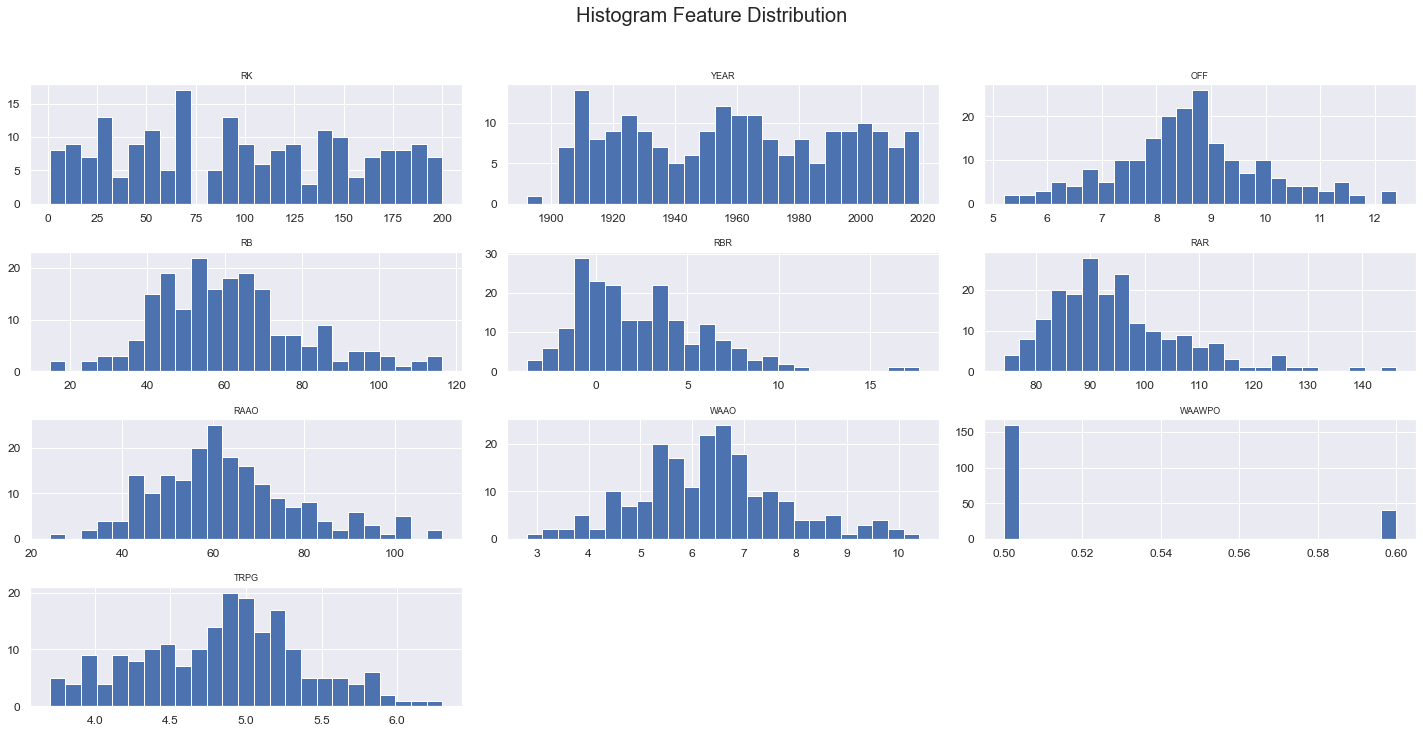

In [13]:
df.hist(bins=25, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

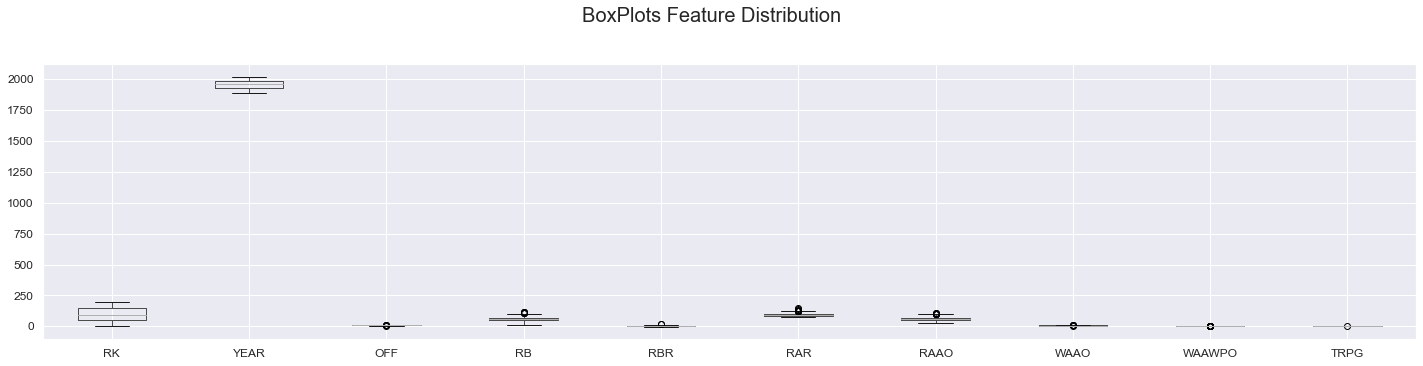

In [14]:
df.boxplot(figsize=(20,5))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

In [15]:
d1.nlargest(10, columns="OFF")

,OFF,RB,RBR,RAR,RAAO,WAAO,WAAWPO,TRPG
PLAYER,,,,,,,,
Babe Ruth,10.83,98.39,-1.09,120.74,90.52,8.45,0.59,5.52
Mickey Mantle,10.04,74.14,5.86,102.88,80.90,8.06,0.56,4.96
Ted Williams,9.81,84.93,0.64,98.91,79.04,7.94,0.57,4.97
Robin Yount,9.80,58.70,8.20,105.90,75.50,7.70,0.50,5.00
Ty Cobb,9.78,65.68,6.55,94.25,67.45,7.33,0.55,4.43
Rogers Hornsby,9.76,75.02,-0.54,103.64,79.49,7.73,0.56,5.14
Sammy Sosa,9.70,84.00,1.00,107.70,80.00,7.60,0.50,5.20
Barry Bonds,9.58,82.24,2.04,103.51,78.51,7.67,0.55,5.01
Lou Gehrig,9.56,87.00,-1.29,105.06,78.59,7.10,0.53,5.71


In [16]:
d2.nlargest(10, columns="OFF")

,OFF,RB,RBR,RAR,RAAO,WAAO,WAAWPO,TRPG
YEAR,,,,,,,,
1908,11.40,61.60,4.40,97.10,76.10,9.30,0.60,3.80
1924,11.15,97.70,-2.40,124.15,94.10,8.90,0.60,5.40
1926,11.10,97.50,-0.50,119.40,89.90,8.60,0.60,5.40
1921,11.05,96.30,-0.65,124.80,94.00,8.80,0.60,5.45
1956,10.70,84.50,5.50,116.40,91.40,8.70,0.60,5.30
1957,10.45,83.80,2.75,103.15,83.80,8.60,0.60,4.80
2002,10.25,80.15,1.55,106.00,82.75,8.05,0.55,5.20
1925,10.20,87.30,0.90,111.10,92.70,8.40,0.60,5.80
1942,10.10,86.60,0.40,103.60,80.10,8.30,0.60,4.80


In [17]:
d3 = pd.DataFrame(d1.nlargest(10, columns="OFF"))
d3

,OFF,RB,RBR,RAR,RAAO,WAAO,WAAWPO,TRPG
PLAYER,,,,,,,,
Babe Ruth,10.83,98.39,-1.09,120.74,90.52,8.45,0.59,5.52
Mickey Mantle,10.04,74.14,5.86,102.88,80.90,8.06,0.56,4.96
Ted Williams,9.81,84.93,0.64,98.91,79.04,7.94,0.57,4.97
Robin Yount,9.80,58.70,8.20,105.90,75.50,7.70,0.50,5.00
Ty Cobb,9.78,65.68,6.55,94.25,67.45,7.33,0.55,4.43
Rogers Hornsby,9.76,75.02,-0.54,103.64,79.49,7.73,0.56,5.14
Sammy Sosa,9.70,84.00,1.00,107.70,80.00,7.60,0.50,5.20
Barry Bonds,9.58,82.24,2.04,103.51,78.51,7.67,0.55,5.01
Lou Gehrig,9.56,87.00,-1.29,105.06,78.59,7.10,0.53,5.71


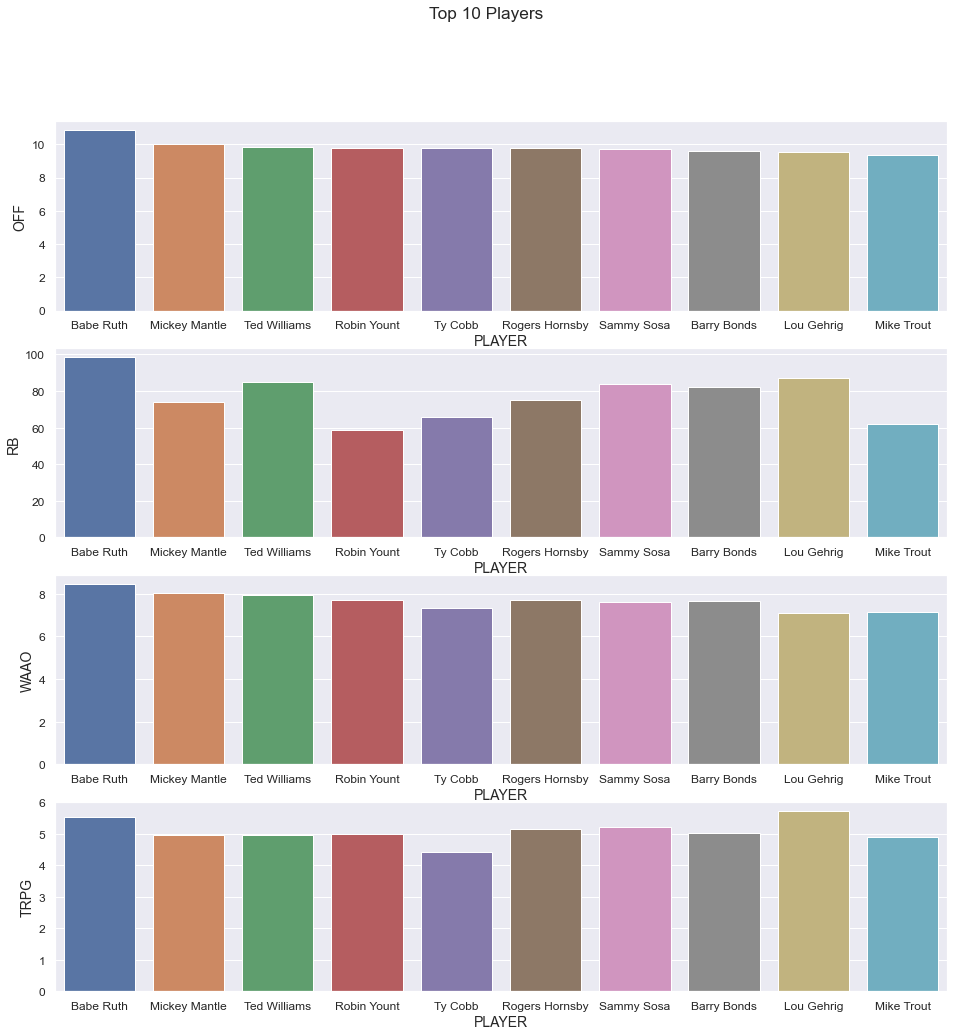

In [18]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(4,1, sharex=False, figsize=(16,16))
fig.suptitle('Top 10 Players')


sns.barplot(x=d3.index, y="OFF", data=d3, ax=ax[0])
#ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)

sns.barplot(x=d3.index, y="RB", data=d3, ax=ax[1])
#ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)

sns.barplot(x=d3.index, y="WAAO", data=d3, ax=ax[2])
#ax[2].set_title('Title of the third chart')
#ax[2].tick_params('x', labelrotation=45)

sns.barplot(x=d3.index, y="TRPG", data=d3, ax=ax[3])
#ax[3].set_title('Title of the fourth chart')
#ax[3].tick_params('x', labelrotation=45)

plt.show()

### Time-Series Analysis

In [19]:
d2.columns

Index(['OFF', 'RB', 'RBR', 'RAR', 'RAAO', 'WAAO', 'WAAWPO', 'TRPG'], dtype='object')

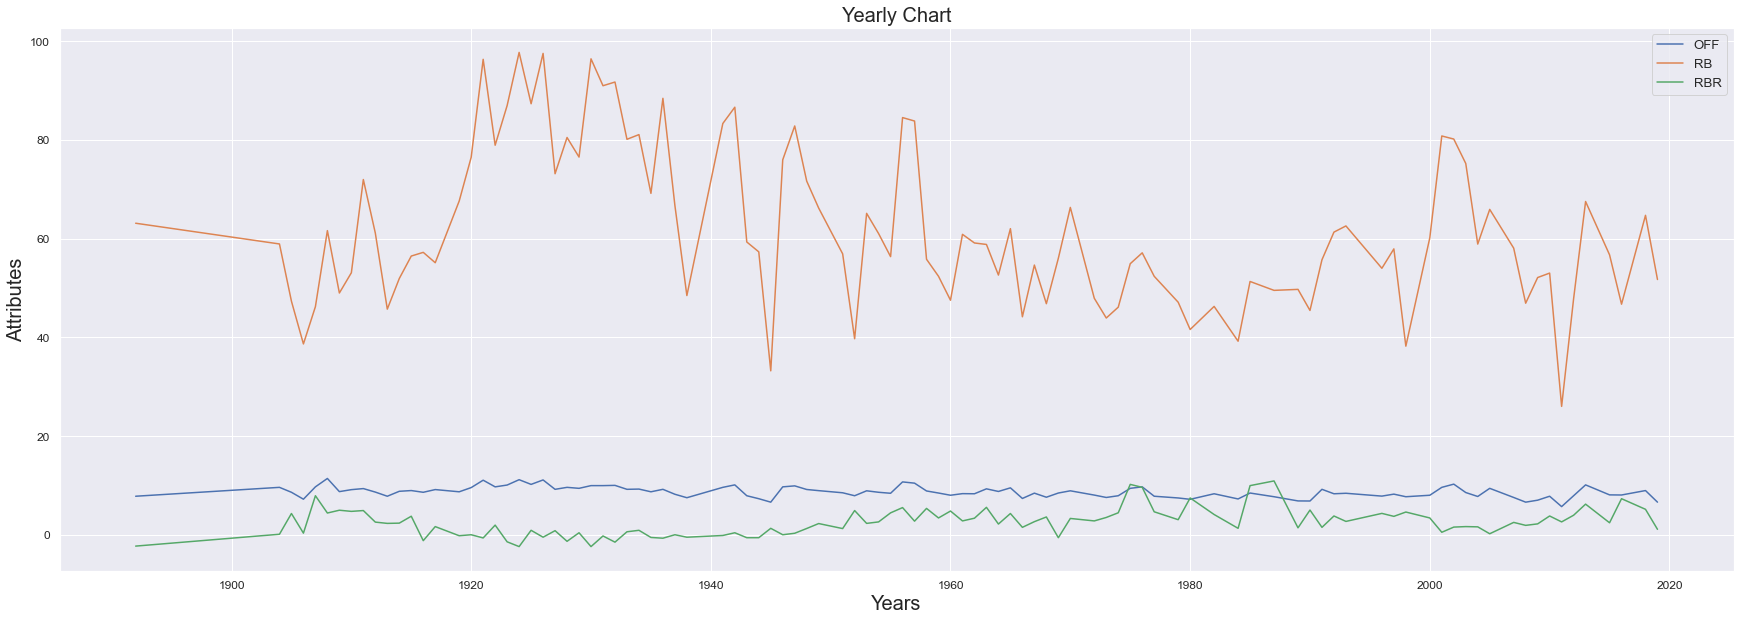

In [20]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=d2.index,y=d2.OFF, data=d2, estimator=None)
sns.lineplot(x=d2.index,y=d2.RB, data=d2, estimator=None)
sns.lineplot(x=d2.index,y=d2.RBR, data=d2, estimator=None)

plt.title("Yearly Chart", fontsize=20)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Attributes", fontsize=20)
plt.legend(['OFF', "RB", "RBR"])
plt.show()

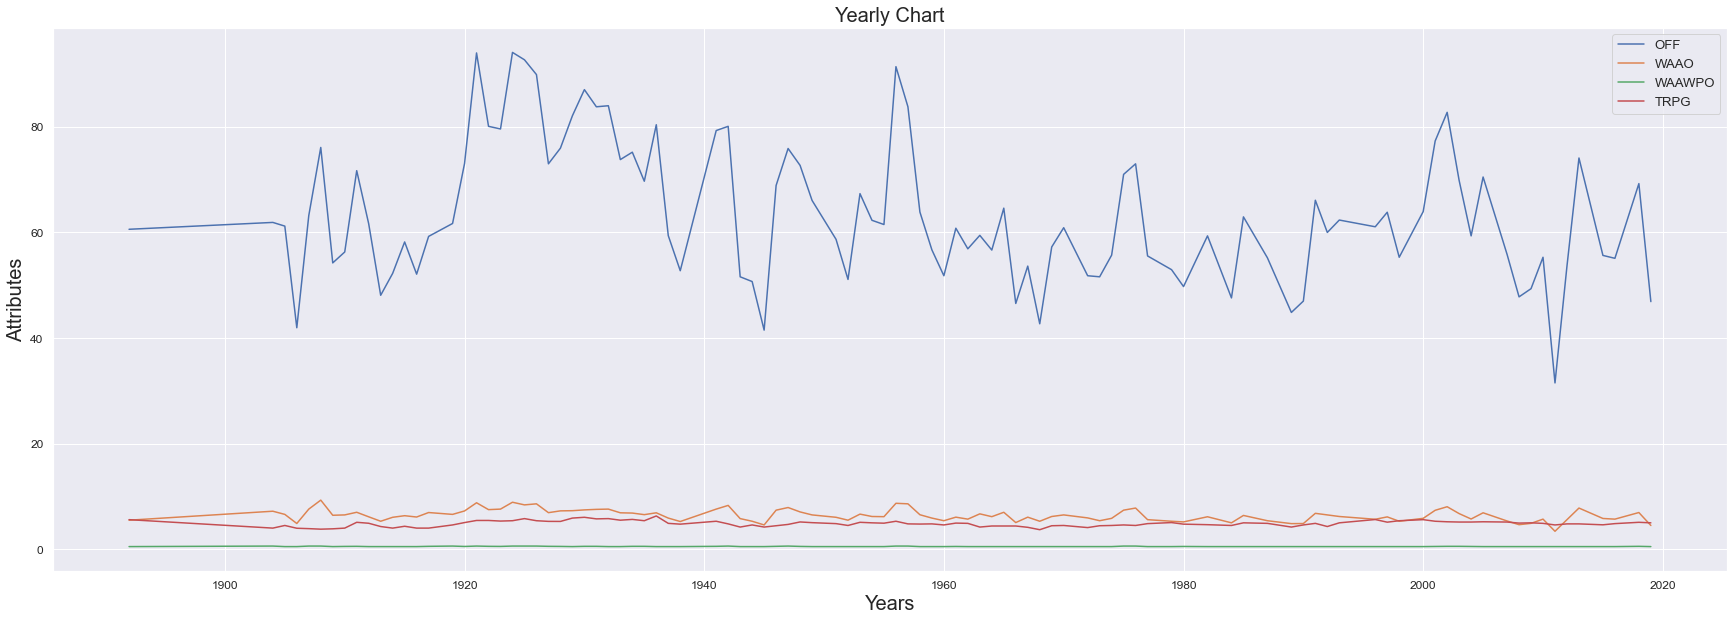

In [21]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=d2.index,y=d2.RAAO, data=d2, estimator=None)
sns.lineplot(x=d2.index,y=d2.WAAO, data=d2, estimator=None)
sns.lineplot(x=d2.index,y=d2.WAAWPO, data=d2, estimator=None)
sns.lineplot(x=d2.index,y=d2.TRPG, data=d2, estimator=None)
plt.title("Yearly Chart", fontsize=20)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Attributes", fontsize=20)
plt.legend(['OFF', "WAAO", "WAAWPO", "TRPG"])
plt.show()

### Correlation

In [22]:
df.corr()

,RK,YEAR,OFF,RB,RBR,RAR,RAAO,WAAO,WAAWPO,TRPG
RK,1.00,0.33,-0.96,-0.82,0.08,-0.62,-0.89,-0.94,-0.62,-0.29
YEAR,0.33,1.00,-0.33,-0.23,0.25,-0.05,-0.21,-0.27,-0.24,0.11
OFF,-0.96,-0.33,1.00,0.86,-0.12,0.68,0.93,0.98,0.66,0.31
RB,-0.82,-0.23,0.86,1.00,-0.37,0.74,0.93,0.87,0.61,0.56
RBR,0.08,0.25,-0.12,-0.37,1.00,-0.13,-0.18,-0.11,-0.11,-0.19
RAR,-0.62,-0.05,0.68,0.74,-0.13,1.00,0.80,0.69,0.55,0.65
RAAO,-0.89,-0.21,0.93,0.93,-0.18,0.80,1.00,0.95,0.68,0.58
WAAO,-0.94,-0.27,0.98,0.87,-0.11,0.69,0.95,1.00,0.71,0.32
WAAWPO,-0.62,-0.24,0.66,0.61,-0.11,0.55,0.68,0.71,1.00,0.23
TRPG,-0.29,0.11,0.31,0.56,-0.19,0.65,0.58,0.32,0.23,1.00


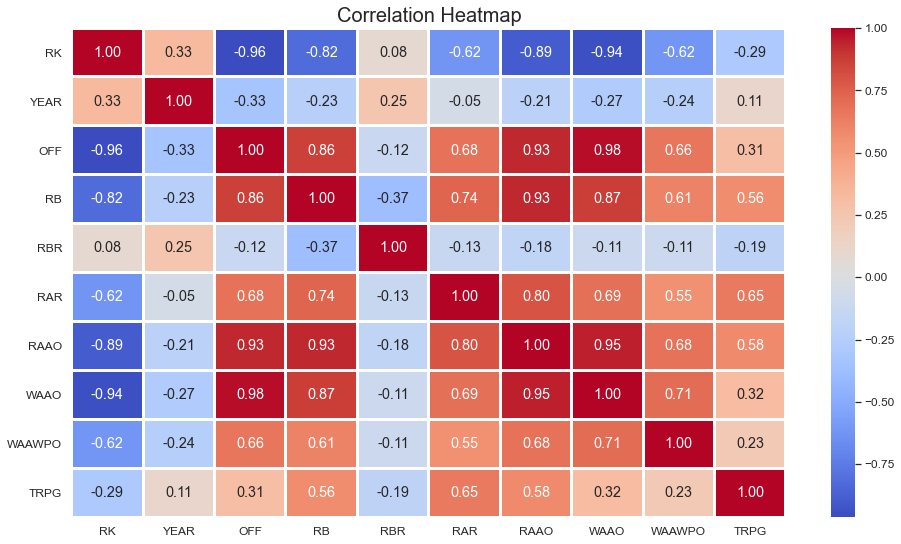

In [23]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

#### Python code done by Dennis Lam